# Graphs
We've seen in class how graphs can be used to represent social links and analyze community structure. Let's go through a simple example of network analysis by building a graph from scratch and analyzing its community structure. 

*Question 1:* Consider the dataset given below, which represents a (bidirectional) friend network. 

In [2]:
friends = {
    'Adam': {'Amy', 'Mark', 'Frank', 'George'}, 
    'George': {'Frank', 'Abigail', 'Harry', 'Howard'}, 
    'Geoff': {'Harry', 'Frank', 'Adam'}, 
    'Amy': {'Abigail', 'Helen', 'Hiram'}, 
    'Helen': {'Veronica', 'Hiram', 'Jackie', 'Fred'},
    'Hiram': {'Fred', 'Jackie', 'Janice'}
}; 
friends

{'Adam': {'Amy', 'Frank', 'George', 'Mark'},
 'George': {'Abigail', 'Frank', 'Harry', 'Howard'},
 'Geoff': {'Adam', 'Frank', 'Harry'},
 'Amy': {'Abigail', 'Helen', 'Hiram'},
 'Helen': {'Fred', 'Hiram', 'Jackie', 'Veronica'},
 'Hiram': {'Fred', 'Jackie', 'Janice'}}

This is a dictionary of people and their friends, where each friend list is a Python set. Note, particularly, that this contains some inconsistent redundancy. You may assume in this case that if x is a friend of y, then y is a friend of x. 

First, we need to put this data into a form that can become a graph. One way to do this is to construct a set of tuples that are unique. Construct a set of tuples that represent friendships from the above dataset, ensuring that each pair appears only once by sorting pairs into alphabetical order. Put the result into the variable `pairs`. 

In [3]:
# BEGIN SOLUTION
pairs = set()

for person, friends_set in friends.items():
    for friend in friends_set:
        # Sort each pair and add as a tuple to ensure uniqueness
        pairs.add(tuple(sorted((person, friend))))


# END SOLUTION
pairs

{('Abigail', 'Amy'),
 ('Abigail', 'George'),
 ('Adam', 'Amy'),
 ('Adam', 'Frank'),
 ('Adam', 'Geoff'),
 ('Adam', 'George'),
 ('Adam', 'Mark'),
 ('Amy', 'Helen'),
 ('Amy', 'Hiram'),
 ('Frank', 'Geoff'),
 ('Frank', 'George'),
 ('Fred', 'Helen'),
 ('Fred', 'Hiram'),
 ('Geoff', 'Harry'),
 ('George', 'Harry'),
 ('George', 'Howard'),
 ('Helen', 'Hiram'),
 ('Helen', 'Jackie'),
 ('Helen', 'Veronica'),
 ('Hiram', 'Jackie'),
 ('Hiram', 'Janice')}

In [4]:
assert len(pairs) == 21

In [5]:
assert ('Geoff', 'Harry') in pairs

In [6]:
for p in friends: 
    for q in friends[p]: 
        if p < q: 
            assert (p, q) in pairs
        else: 
            assert (q, p) in pairs

In [7]:
for r in pairs: 
    found = False
    if r[0] in friends: 
        found = r[1] in friends[r[0]]
    if r[1] in friends: 
        found = found or r[0] in friends[r[1]]
    assert found

*Question 2:* Now we need to get this into a graph. This graph is a rather simple one, because it represents one relationship between entities. 

Read the tutorial: https://networkx.org/documentation/stable/tutorial.html
and create a networkx graph `net` from the information in `pairs`. 

*Hints:* 
1. The id of a node should be the name of a person. You are not limited to numeric ids. 
2. You will have to construct the node list as its own set of names. 

In [9]:
import networkx as nx
# BEGIN SOLUTION
net = nx.Graph()
net.add_edges_from(pairs)

# END SOLUTION 
net.edges

EdgeView([('Fred', 'Helen'), ('Fred', 'Hiram'), ('Helen', 'Amy'), ('Helen', 'Jackie'), ('Helen', 'Hiram'), ('Helen', 'Veronica'), ('Adam', 'Mark'), ('Adam', 'Frank'), ('Adam', 'Geoff'), ('Adam', 'Amy'), ('Adam', 'George'), ('Frank', 'Geoff'), ('Frank', 'George'), ('Geoff', 'Harry'), ('Abigail', 'Amy'), ('Abigail', 'George'), ('Amy', 'Hiram'), ('George', 'Harry'), ('George', 'Howard'), ('Hiram', 'Jackie'), ('Hiram', 'Janice')])

In [10]:
assert isinstance(net, nx.classes.graph.Graph)

In [11]:
assert len(net.nodes) == 15 

In [12]:
assert len(net.edges) == 21

In [13]:
assert ('Veronica', 'Helen',) in net.edges

In [14]:
for p in friends: 
    assert p in net.nodes
    for q in friends[p]: 
        assert q in net.nodes
        assert (p, q) in net.edges

*Question 3:* Use the spring layout algorithm discussed in class to create a visualization of this graph. Label each node with the person's name. 

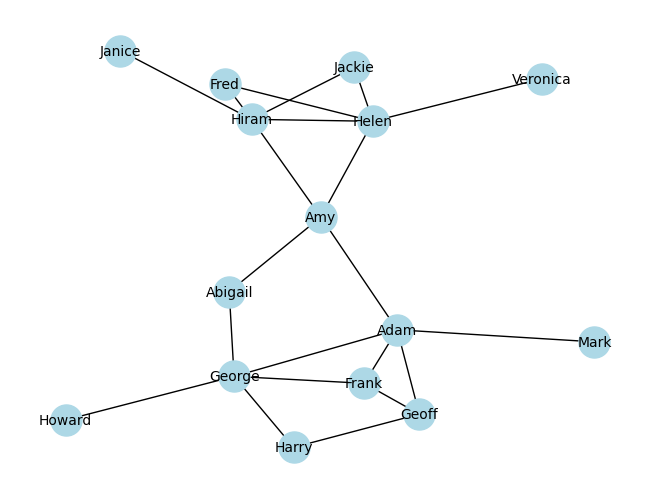

In [15]:
# BEGIN SOLUTION
import matplotlib.pyplot as plt

pos = nx.spring_layout(net)

nx.draw(net, pos, with_labels=True, node_size=500, node_color="lightblue", font_size=10)
plt.show()

# END SOLUTION

*Question 4:* Now we have a theoretical picture of the two possible communities in the graph above. Run greedy community analysis as described in class on this graph, and put the result into a variable `comms`

In [25]:
# BEGIN SOLUTION
from networkx.algorithms.community import greedy_modularity_communities

comms = list(greedy_modularity_communities(net))



# END SOLUTION
comms

[frozenset({'Adam', 'Frank', 'Geoff', 'George', 'Harry', 'Howard', 'Mark'}),
 frozenset({'Fred', 'Helen', 'Hiram', 'Jackie', 'Janice', 'Veronica'}),
 frozenset({'Abigail', 'Amy'})]

In [17]:
assert len(comms) == 3

In [18]:
c0 = (comms[0] | {'Abigail', 'Amy'}) == {'Abigail', 'Amy'}
c1 = (comms[1] | {'Abigail', 'Amy'}) == {'Abigail', 'Amy'}
c2 = (comms[2] | {'Abigail', 'Amy'}) == {'Abigail', 'Amy'}
assert c0 or c1 or c2

*Question 5:* Draw the graph again, depicting the communities as nodes of different colors, e.g., red, green, blue. Label each node in the graph with the person's name. 

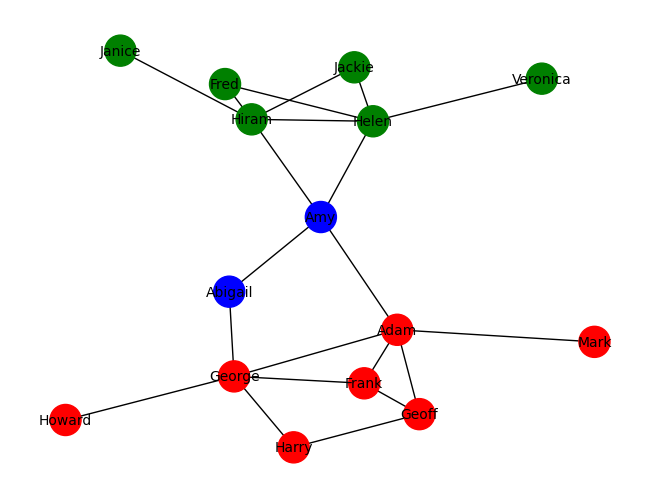

In [27]:
# BEGIN SOLUTION
import itertools

colors = ['red', 'green', 'blue', 'orange', 'yellow']
node_colors = {}

# Assign a unique color to each community
for color, community in zip(itertools.cycle(colors), comms):
    for node in community:
        node_colors[node] = color

# Prepare color list for nodes based on community
node_color_list = [node_colors[node] for node in net.nodes]

nx.draw(net, pos, with_labels=True, node_color=node_color_list, node_size=500, font_size=10)
plt.show()

# END SOLUTION